In [ ]:
# 선형 : 선으로 구성되어 있는 데이터 (예측가능)
# 비선형 : 1개의 직선으로 표현되어 있지 않는 데이터 -> 선으로 변환(미분) 
# 적분 : 미분의 반대 ,  선에서 점으로 변환

# 회귀분석 (Regression)
- 데이터를 이용하여 함수식(Y= aX +b)를 구한다.
- 기울기(Deeo Learning :Weight) 와 절편(DL:Bias)을 DataSet으로 최적값(y^)을 구한다.(정답과 오차율의 차이가 제일 적은 것으로 선택)
- 기울기와 절편으로 Y값을 예측할 수 있다. 

### 단순회귀분석 : Y = aX + b


In [2]:
regression <- read.csv("../Data/regression.csv")
head(regression)
tail(regression)

age,Height,Weight
0~3Months,59.1,5.9
3~6Months,66.7,8.0
6~9Months,71.4,8.9
9~12Months,75.0,10.1
12~18Months,80.1,10.9
2Year,87.8,13.2


,age,Height,Weight
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


In [4]:
str(regression)

'data.frame':	31 obs. of  3 variables:
 $ age   : Factor w/ 31 levels "0~3Months","10Year",..: 1 19 26 31 5 15 18 21 23 25 ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


In [5]:
summary(regression)

          age         Height          Weight     
 0~3Months  : 1   Min.   : 59.1   Min.   : 5.90  
 10Year     : 1   1st Qu.:105.7   1st Qu.:17.90  
 11Year     : 1   Median :150.7   Median :45.20  
 12Year     : 1   Mean   :135.8   Mean   :42.62  
 12~18Months: 1   3rd Qu.:169.8   3rd Qu.:66.65  
 13Year     : 1   Max.   :173.8   Max.   :72.30  
 (Other)    :25                                  

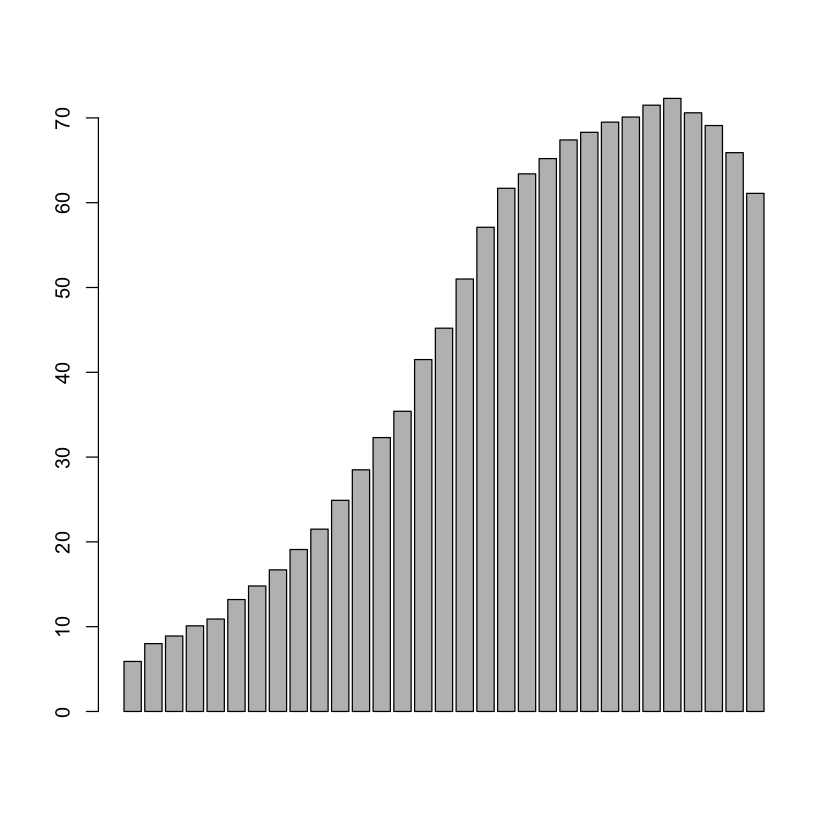

In [4]:
par(bg="white")
barplot(regression$Weight)

In [11]:
cor(regression$Height,regression$Weight)

[1] 0.9672103

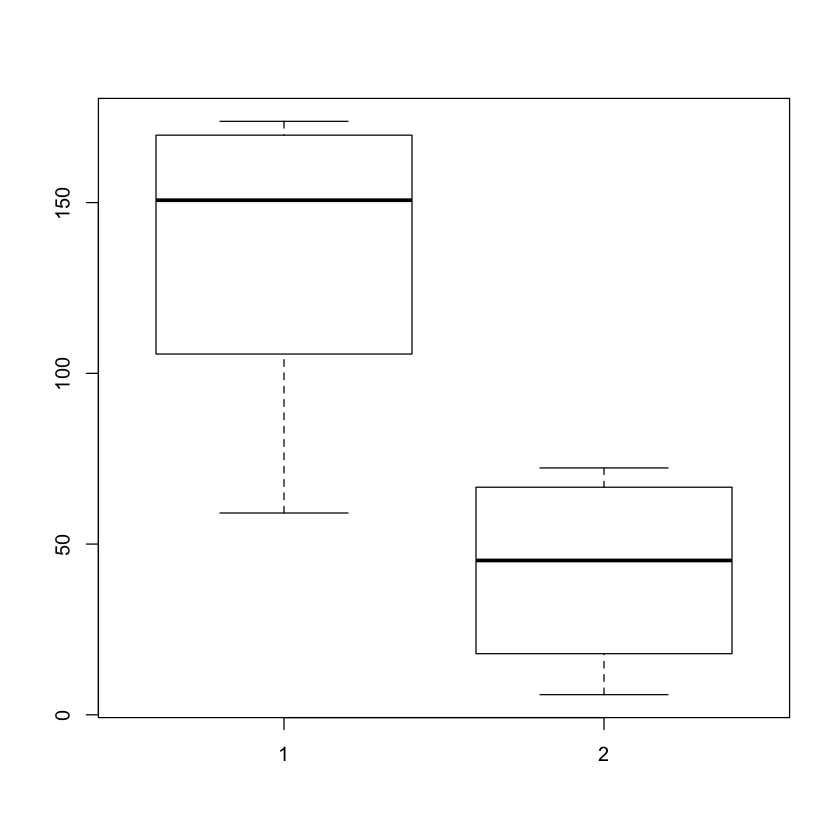

In [3]:
par(bg="white")
boxplot(regression$Height,regression$Weight)

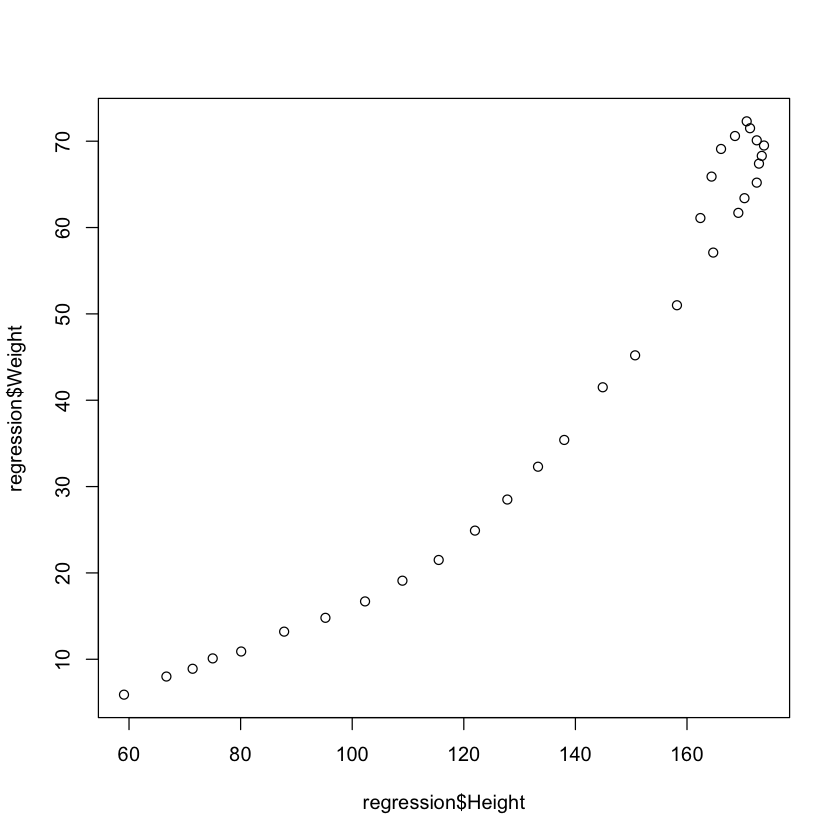

In [5]:
par(bg="white")
plot(regression$Height,regression$Weight)

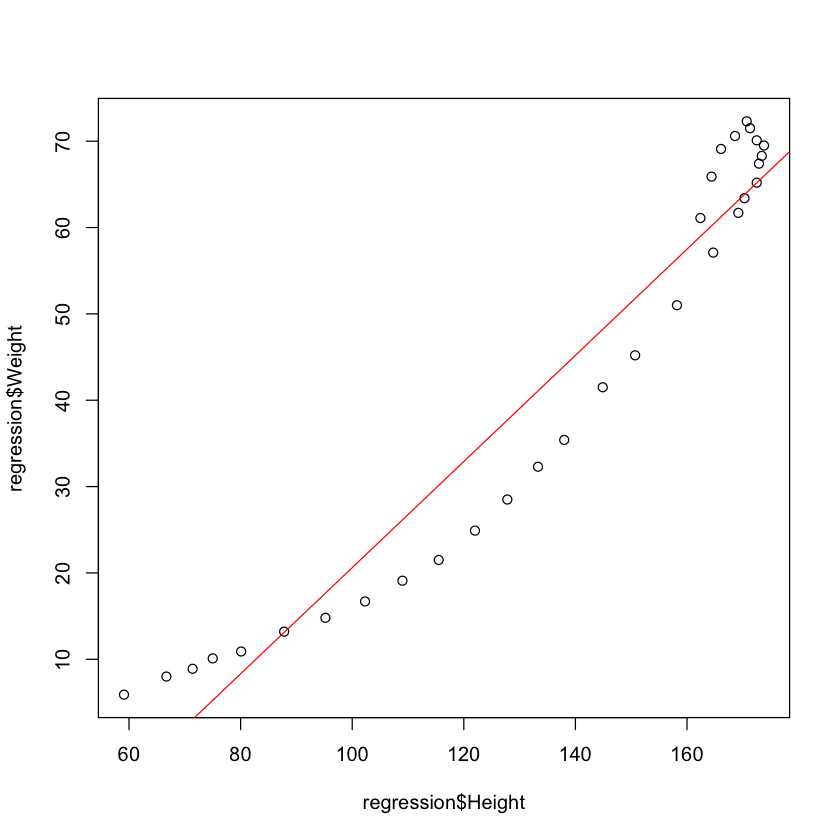

In [6]:
par(bg="white")
plot(regression$Weight ~ regression$Height)
# 회귀선 (중심선, 평균선) 
r <- lm(regression$Weight ~ regression$Height)      # y(weight)는 종속변수 x(height)는 독립변수 
abline(r, col ='red')

In [21]:
# 분석 결과
summary(r)
options(scipen = 100)


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value             Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666       0.000000000142 ***
regression$Height   0.61474    0.02998  20.508 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 0.00000000000000022


In [ ]:
p-value: < 0.00000000000000022 < 0.05 
Adjusted R-squared:  0.9333 <- 예측력(정확도)
Residual standard error: 6.355 <- 표준오차 
degrees of freedom ( 자유도 )

In [ ]:
# y <- target column ,  x<- feature column
# Coefficients *의 개수가 많을수록 의미가 큰 것 

In [22]:
# 회귀식
r


Call:
lm(formula = regression$Weight ~ regression$Height)

Coefficients:
      (Intercept)  regression$Height  
         -40.8659             0.6147  


In [28]:
# 키가 170 이상인 사람의 몸무게 ,Intercept= y= ax + b의 b에 해당 
tall170 <- 0.6147 * 170 + (  -40.8659 )
tall170
#표준 오차를 적용한 키가 170인 사람의 몸무게 
tall170 -  6.355
tall170 +  6.355 
cat ( tall170 -  6.355 ,"~",tall170 +  6.355 )


[1] 63.6331

[1] 57.2781

[1] 69.9881

57.2781 ~ 69.9881

In [7]:
iq <- read.csv("../Data/IQ.csv")
head(iq)

이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1


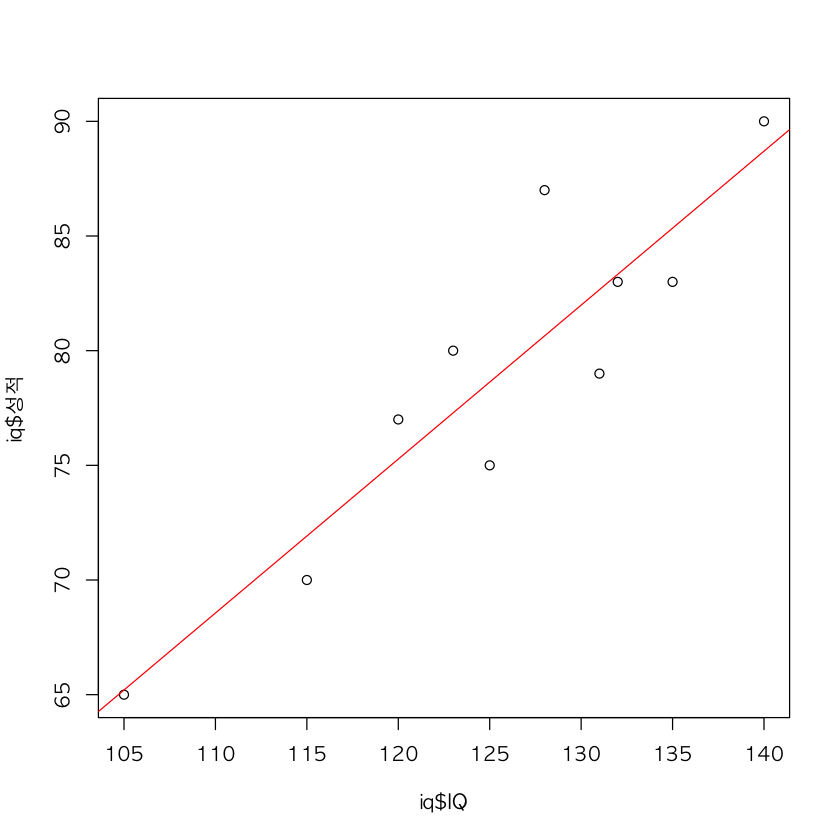

In [8]:
# iq가 126인 사람의 성적 을 추축해보시오 
par(family='AppleGothic', bg='white')
options(warn=-1)
plot(iq$성적 ~iq$IQ)

# 회귀선  
r2 <- lm(iq$성적 ~iq$IQ)      # y(weight)는 종속변수 x(height)는 독립변수 
abline(r2, col ='red')

In [39]:
summary(r2)
# intercept에 *** 가 없으므로 유의미한 데이터가 아님 


Call:
lm(formula = iq$성적 ~ iq$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
iq$IQ         0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [ ]:
p-value: 0.0002547 < 0.05 
Adjusted R-squared:  0.8071  <- 예측력(정확도)
Residual standard error: 3.322 <- 표준오차 

In [40]:
# 회귀식
r2


Call:
lm(formula = iq$성적 ~ iq$IQ)

Coefficients:
(Intercept)        iq$IQ  
    -5.2918       0.6714  


In [45]:

# iq가 126인 사람의 성적 을 추측해보시오 
iq126 <- (0.6714 * 126 ) 
iq126
cat(" iq가 126인 사람의 성적의 예측값:",iq126 - 3.322,"~",iq126 + 3.322)

[1] 84.5964

 iq가 126인 사람의 성적의 예측값: 81.2744 ~ 87.9184

In [55]:
# 성적과 가장 관련이 깊은 항목은?
cor(iq[,-1])   


,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
성적,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
다니는.학원수,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
게임하는.시간,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV시청.시간,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000


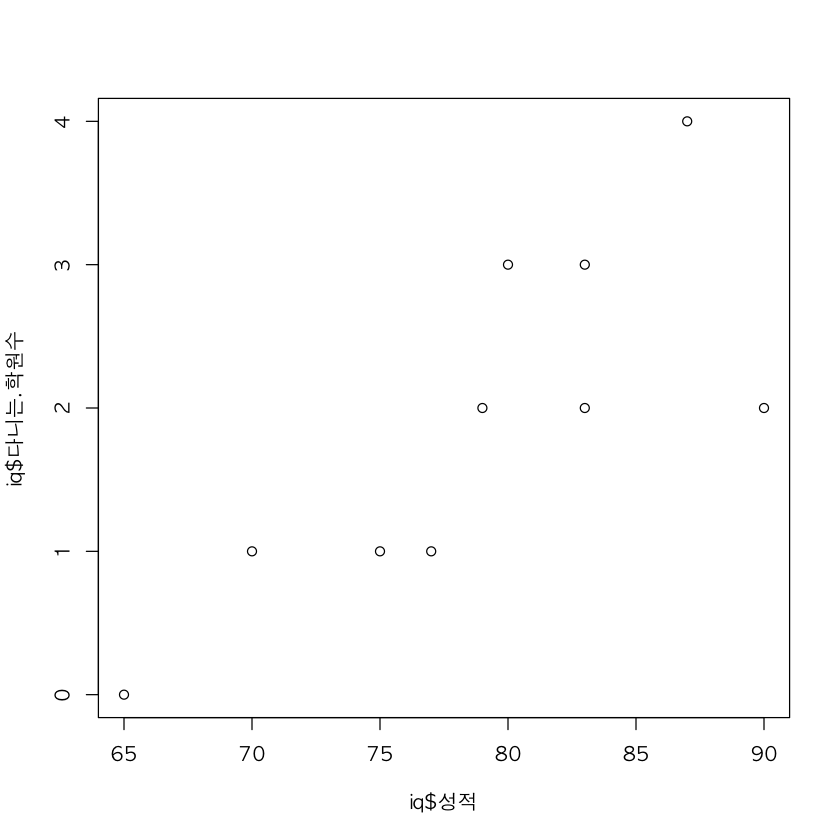

In [9]:
#  학원을 몇군데 다녀야(종속변수) 성적(독립변수)이 90점 이상이 될까?
par(family='AppleGothic', bg='white')
plot(iq$다니는.학원수 ~ iq$성적)

In [134]:
r3 <- lm(iq$다니는.학원수 ~ iq$성적)
#abline(r3,col ="red")
r3


Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Coefficients:
(Intercept)      iq$성적  
    -7.8916       0.1241  


In [135]:
summary(r3)


Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2775 -0.4142 -0.0437  0.4945  1.0948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -7.89163    2.75190  -2.868  0.02090 * 
iq$성적      0.12410    0.03473   3.573  0.00726 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7882 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264


In [ ]:
# 성적이 90점 이상 학원수 예측 
 p-value: 0.007264 < 0.05 
Adjusted R-squared:  0.5666 <- 예측력(정확도)
Residual standard error: 0.7882 <- 표준오차 

In [137]:
성적90 <- (0.1241 * 90) -7.8916 
cat(성적90 - 0.7882,"~",성적90 + 0.7882)

2.4892 ~ 4.0656

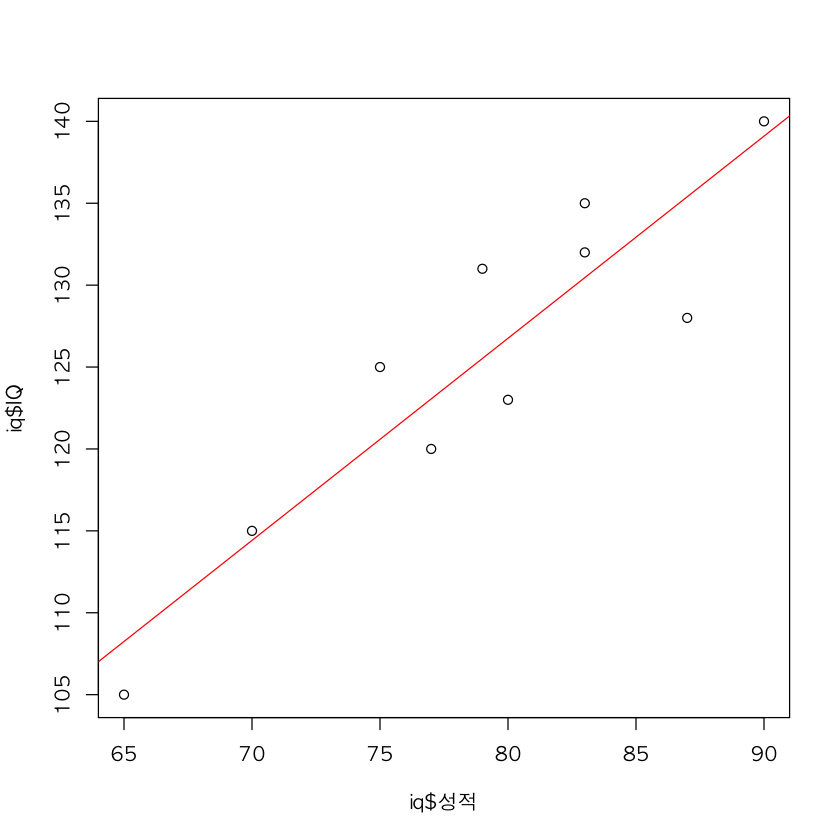

In [12]:
# 성적이 85이라면 iq는 얼마일까 
par(family='AppleGothic', bg='white')
plot(iq$IQ ~ iq$성적)
abline(r4,col ="red")

In [11]:
r4 <- lm(iq$IQ ~ iq$성적)
r4


Call:
lm(formula = iq$IQ ~ iq$성적)

Coefficients:
(Intercept)      iq$성적  
     28.035        1.234  


In [81]:
summary(r4)


Call:
lm(formula = iq$IQ ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
iq$성적       1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [92]:
# 성적이 85이라면 iq는 얼마일까
 p-value: 0.0002547 < 0.05 
Adjusted R-squared:  0.8071  <- 예측력(정확도)
Residual standard error: 4.504<- 표준오차 

성적85 <- ( 1.234 * 85 )+  28.035 
cat((성적85 - 4.504 ),"~", (성적85 + 4.504))



128.421 ~ 137.429

---
## 다중 회귀분석
-여러개의 항목들로 구성된 식으로 예측하는 방법

# attitude
- 대형 금융기관의 사무직 대상으로 진급의 요소에 대한설문조가 30개부서(무작위)약 35명을 대상으로 한 설문지 데이터
- 각 수치는 각 부성의 7개 질문에 대한 점수를 나타낸다. 

In [96]:
help(attitude)

attitude               package:datasets                R Documentation

_T_h_e _C_h_a_t_t_e_r_j_e_e-_P_r_i_c_e _A_t_t_i_t_u_d_e _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     From a survey of the clerical employees of a large financial
     organization, the data are aggregated from the questionnaires of
     the approximately 35 employees for each of 30 (randomly selected)
     departments.  The numbers give the percent proportion of
     favourable responses to seven questions in each department.

_U_s_a_g_e:

     attitude
     
_F_o_r_m_a_t:

     A data frame with 30 observations on 7 variables. The first column
     are the short names from the reference, the second one the
     variable names in the data frame:

          Y  rating      numeric  Overall rating                    
       X[1]  complaints  numeric  Handling of employee complaints   
       X[2]  privileges  numeric  Does not allow special privileges 
       X[3]  learni

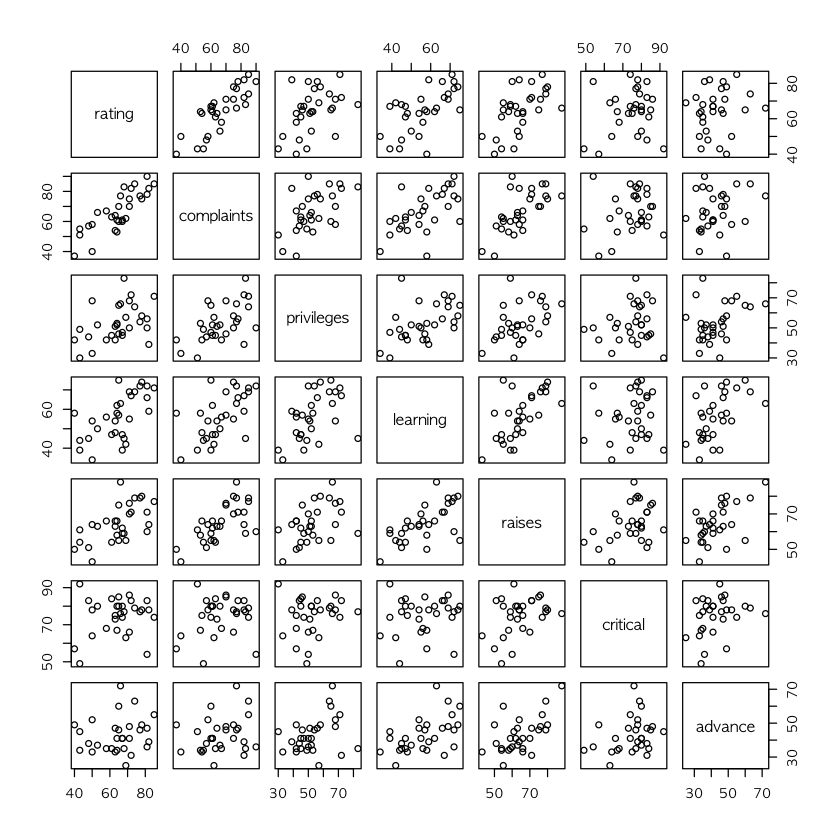

In [14]:
par(family='AppleGothic', bg='white')
plot(attitude)

In [99]:
# 회귀분석 
model <- lm(rating ~ ., data = attitude)     # . > 앞에 rating을 제외한 나머지 칼럼 
model


Call:
lm(formula = rating ~ ., data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


In [ ]:
rating =  0.61319 * complaints + -0.07305* privileges + ... +  10.78708

In [100]:
# model 검토 
# complaints , learning만 관계있음
summary(model)


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 0.0000124


In [101]:
# 상관계수
cor(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


In [102]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거 
reduced<- step(model,direction = "backward")

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  

In [103]:
summary(reduced)


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value   Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398      0.174    
complaints    0.6435     0.1185   5.432 0.00000957 ***
learning      0.2112     0.1344   1.571      0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 0.00000006058


In [ ]:
Adjusted R-squared:  0.6864 (예측력 증가 )

---
# iris에 대한 다중 회귀분석

In [13]:
# 회귀분석 
irismodel <- lm(as.numeric(iris$Species)~ ., data = iris)     # . > 앞에 rating을 제외한 나머지 칼럼 
irismodel


Call:
lm(formula = as.numeric(iris$Species) ~ ., data = iris)

Coefficients:
 (Intercept)  Sepal.Length   Sepal.Width  Petal.Length   Petal.Width  
     1.18650      -0.11191      -0.04008       0.22865       0.60925  


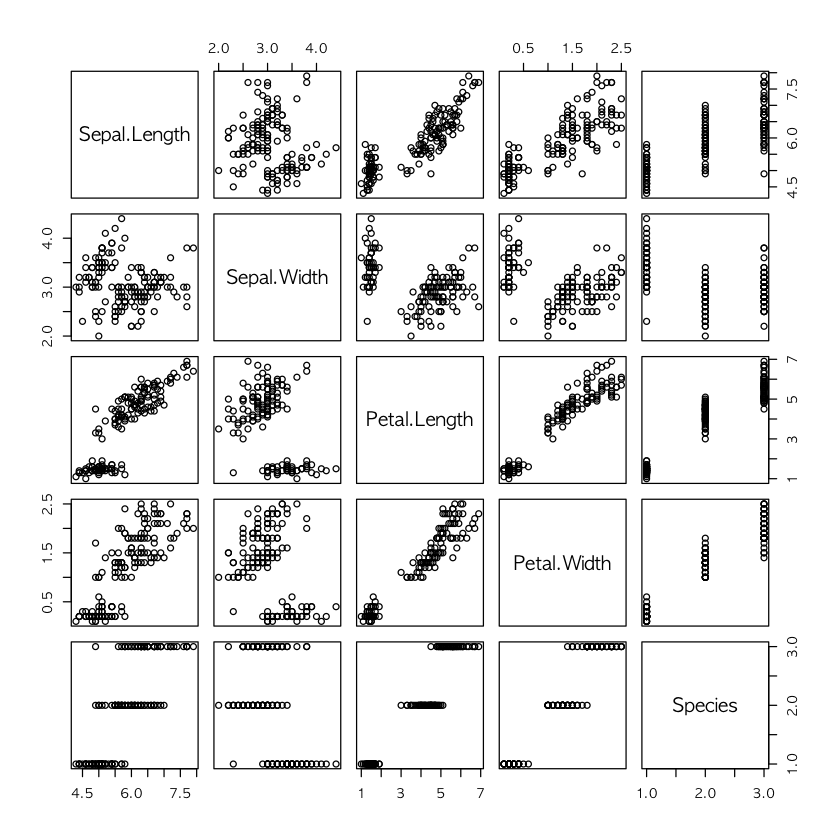

In [15]:
par(family='AppleGothic', bg='white')
plot(iris)

In [126]:
summary(irismodel)


Call:
lm(formula = as.numeric(iris$Species) ~ ., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59215 -0.15368  0.01268  0.11089  0.55077 

Coefficients:
             Estimate Std. Error t value      Pr(>|t|)    
(Intercept)   1.18650    0.20484   5.792 0.00000004150 ***
Sepal.Length -0.11191    0.05765  -1.941        0.0542 .  
Sepal.Width  -0.04008    0.05969  -0.671        0.5030    
Petal.Length  0.22865    0.05685   4.022 0.00009255215 ***
Petal.Width   0.60925    0.09446   6.450 0.00000000156 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2191 on 145 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9285 
F-statistic: 484.5 on 4 and 145 DF,  p-value: < 0.00000000000000022


In [ ]:
Adjusted R-squared:  0.9285 

In [127]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거 
reduced2<- step(irismodel,direction = "backward")

Start:  AIC=-450.56
as.numeric(iris$Species) ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width

               Df Sum of Sq    RSS     AIC
- Sepal.Width   1   0.02164 6.9823 -452.09
<none>                      6.9606 -450.56
- Sepal.Length  1   0.18090 7.1415 -448.71
- Petal.Length  1   0.77649 7.7371 -436.69
- Petal.Width   1   1.99710 8.9577 -414.72

Step:  AIC=-452.09
as.numeric(iris$Species) ~ Sepal.Length + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
<none>                      6.9823 -452.09
- Sepal.Length  1   0.44324 7.4255 -444.86
- Petal.Length  1   1.51946 8.5017 -424.56
- Petal.Width   1   2.11632 9.0986 -414.38


In [128]:
summary(reduced2)


Call:
lm(formula = as.numeric(iris$Species) ~ Sepal.Length + Petal.Length + 
    Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60753 -0.16188  0.01367  0.11217  0.54740 

Coefficients:
             Estimate Std. Error t value       Pr(>|t|)    
(Intercept)   1.14469    0.19478   5.877 0.000000027233 ***
Sepal.Length -0.13624    0.04475  -3.044        0.00277 ** 
Petal.Length  0.25213    0.04473   5.637 0.000000086707 ***
Petal.Width   0.58689    0.08822   6.652 0.000000000541 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2187 on 146 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:  0.9287 
F-statistic: 648.3 on 3 and 146 DF,  p-value: < 0.00000000000000022


In [ ]:
Adjusted R-squared:  0.9287 

In [132]:
cat("제거하기 전" ,"0.9285\n","제거하고 나서","0.9287")

제거하기 전 0.9285
 제거하고 나서 0.9287